<a href="https://colab.research.google.com/github/danielefak/BNL-Dirichlet/blob/master/TID_analysis_and_dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta

# TID Analysis

In [3]:
df_TID = pd.read_csv('/content/gdrive/Shareddrives/T-FORSE/TID_catalog.csv')
print(len(df_TID))
df_TID.tail()

760


,duration,period,amp,spcont,vel,azi,qi,dt
755,1.9,136.00,0.49,74.05,698.31,213.60,0.49,29-Nov-2022 21:50:00
756,6.8,121.15,0.86,60.20,657.88,183.86,0.56,01-Dec-2022 17:50:00
757,2.5,135.53,0.67,78.25,431.76,206.34,0.41,05-Dec-2022 20:30:00
758,5.0,124.87,1.89,74.40,419.81,199.57,0.41,07-Dec-2022 17:20:00
759,1.5,129.74,0.93,73.14,344.59,238.78,0.28,23-Dec-2022 22:20:00


In [4]:
df_TID['year'] = pd.DatetimeIndex(df_TID['dt']).year
df_TID['month'] = pd.DatetimeIndex(df_TID['dt']).month
df_TID['hour'] = pd.DatetimeIndex(df_TID['dt']).hour

ISTANZE NEL TEMPO: MESE, ANNO, ORA

<Axes: xlabel='month'>

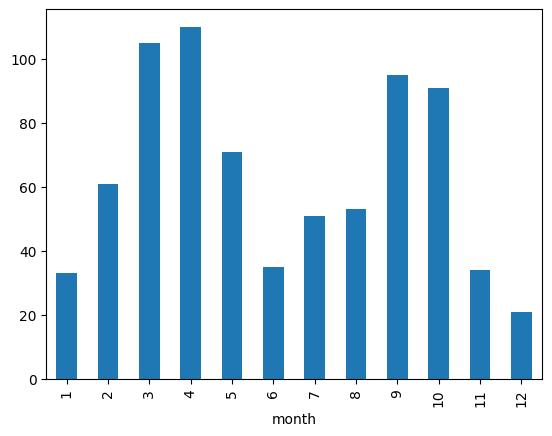

In [5]:
df_TID['dt'].groupby(df_TID["month"]).count().plot(kind="bar")

<Axes: xlabel='year'>

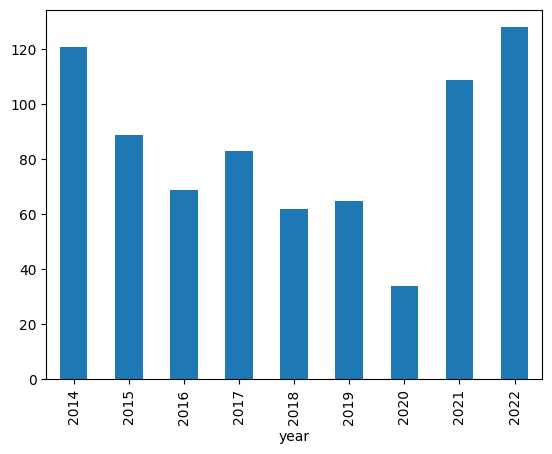

In [6]:
df_TID['dt'].groupby(df_TID["year"]).count().plot(kind="bar")

In [7]:
df_solar = pd.read_csv('/content/gdrive/Shareddrives/T-FORSE/solar_data.csv')
df_solar['year'] = pd.DatetimeIndex(df_solar['dt']).year
df_solar['month'] = pd.DatetimeIndex(df_solar['dt']).month
df_solar.tail()

,dayofrotation,sunspostn,f107adj,dt,year,month
3789,13,120,154.1,18-May-2023,2023,5
3790,14,135,168.5,19-May-2023,2023,5
3791,15,140,173.7,20-May-2023,2023,5
3792,16,138,167.3,21-May-2023,2023,5
3793,17,131,165.5,22-May-2023,2023,5


<Axes: xlabel='year'>

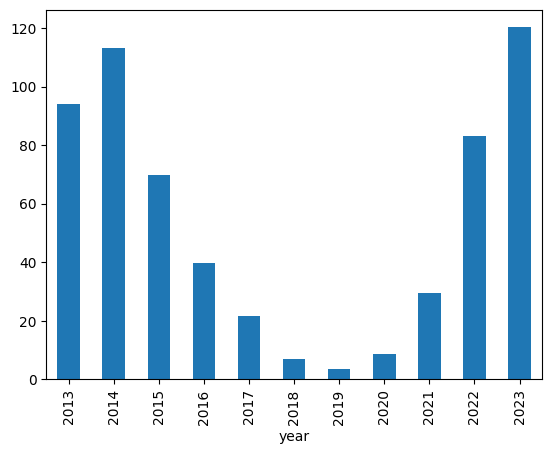

In [8]:
df_solar['sunspostn'].groupby(df_solar["year"]).mean().plot(kind="bar")

<Axes: xlabel='year'>

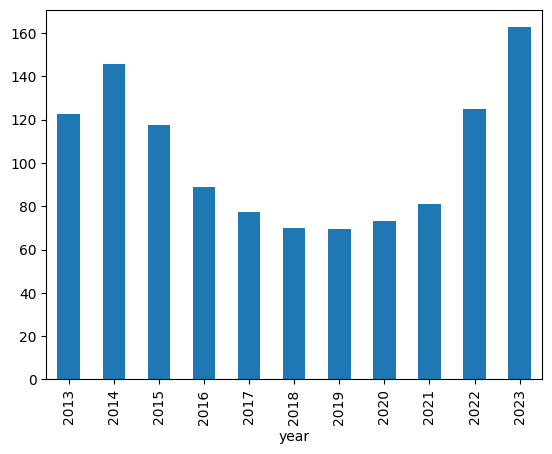

In [9]:
df_solar['f107adj'].groupby(df_solar["year"]).mean().plot(kind="bar")

<Axes: xlabel='hour'>

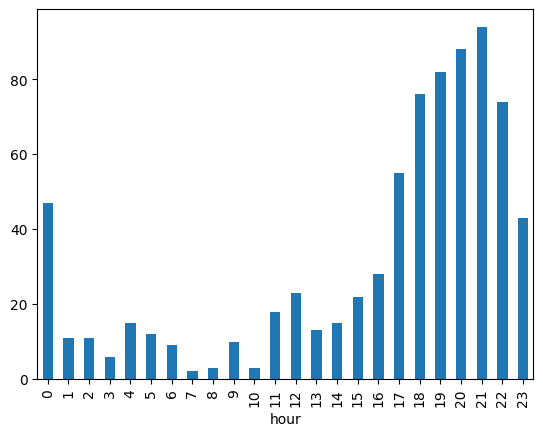

In [10]:
df_TID['dt'].groupby(df_TID["hour"]).count().plot(kind="bar")

DURATA MEDIA NEL TEMPO: MESE, ORA

3.9973684210526317


<Axes: xlabel='duration'>

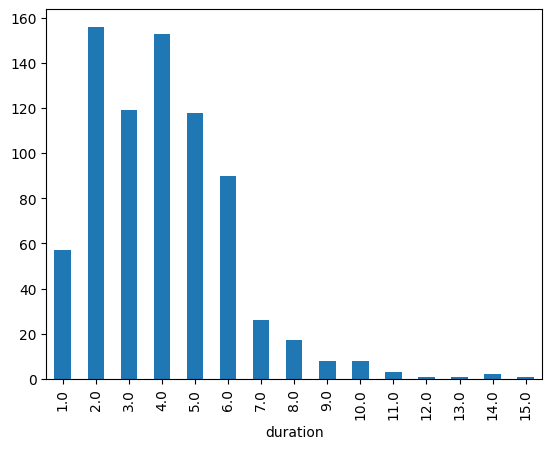

In [11]:
print(df_TID['duration'].mean())
df_TID['duration'].groupby(df_TID["duration"].round(decimals=0) ).count().plot(kind="bar")

<Axes: xlabel='hour'>

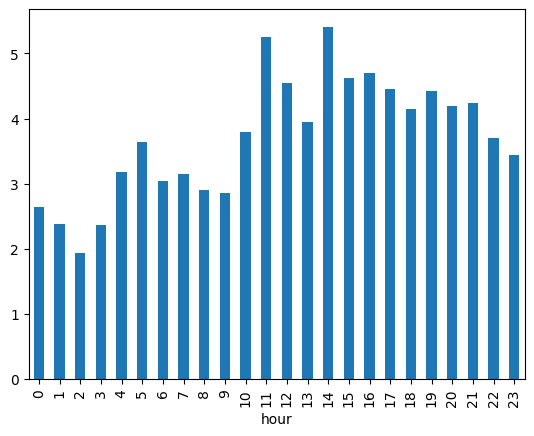

In [12]:
df_TID['duration'].groupby(df_TID["hour"]).mean().plot(kind="bar")

<Axes: xlabel='month'>

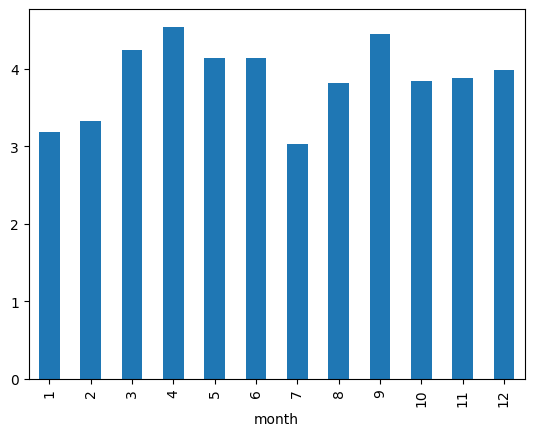

In [13]:
df_TID['duration'].groupby(df_TID["month"]).mean().plot(kind="bar")

PERIODO MEDIO: MESE, ORA

121.97172368421052


<Axes: xlabel='period'>

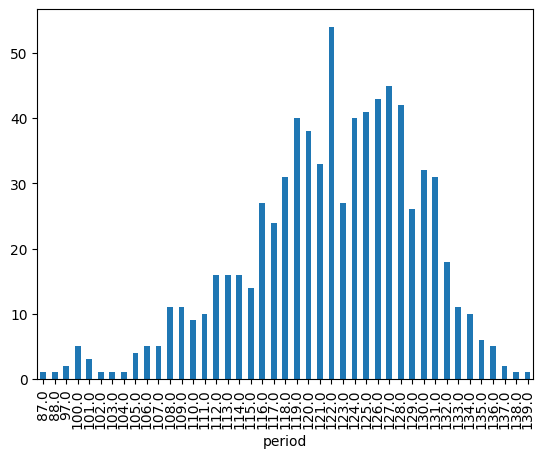

In [14]:
print(df_TID['period'].mean())
df_TID['period'].groupby(df_TID["period"].round(decimals=0) ).count().plot(kind="bar")

<Axes: xlabel='hour'>

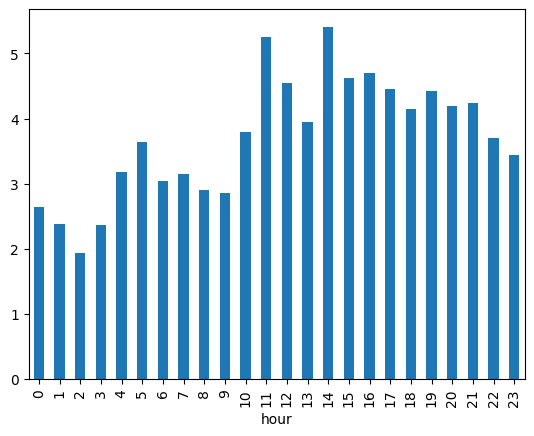

In [15]:
df_TID['duration'].groupby(df_TID["hour"]).mean().plot(kind="bar")

<Axes: xlabel='month'>

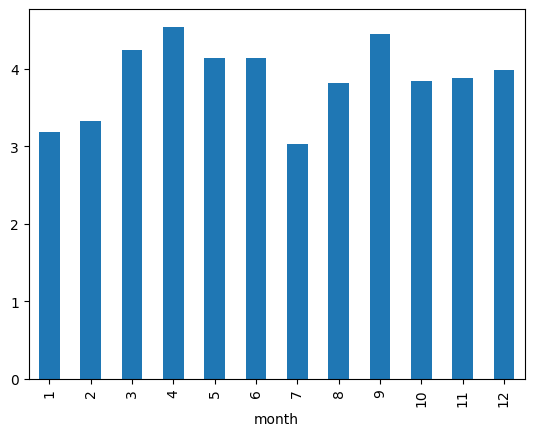

In [16]:
df_TID['duration'].groupby(df_TID["month"]).mean().plot(kind="bar")

#Featrures


## Auroral Electrojet

In [17]:
df_electrojet = pd.read_csv('/content/gdrive/Shareddrives/T-FORSE/ImageIDX.csv')
df_electrojet['dt'] = pd.to_datetime(df_electrojet['dt'], format="%d-%b-%Y %H:%M:%S")
df_electrojet = df_electrojet.set_index(df_electrojet['dt'])
df_electrojet_res = df_electrojet.resample('30T').mean()
df_electrojet_res['dt'] = df_electrojet_res.index
df_electrojet_res['year'] = pd.DatetimeIndex(df_electrojet_res['dt']).year
df_electrojet_res = df_electrojet_res[df_electrojet_res['year']>=2014]
df_electrojet_res.head()

<ipython-input-17-1fc63c6927c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_electrojet_res = df_electrojet.resample('30T').mean()


,IL,IU,IE,dt,year
dt,,,,,
2014-01-01 00:00:00,-36.811667,7.091667,43.903333,2014-01-01 00:00:00,2014
2014-01-01 00:30:00,-71.978333,8.318333,80.296667,2014-01-01 00:30:00,2014
2014-01-01 01:00:00,-93.480000,12.368333,105.848333,2014-01-01 01:00:00,2014
2014-01-01 01:30:00,-104.801667,9.903333,114.705000,2014-01-01 01:30:00,2014
2014-01-01 02:00:00,-100.380000,9.541667,109.921667,2014-01-01 02:00:00,2014


0.9019115708346009


<Axes: ylabel='Frequency'>

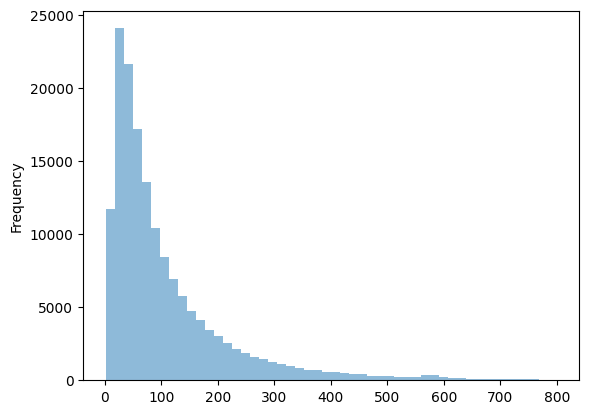

In [18]:
print(len(df_electrojet_res[df_electrojet_res['IE'] > 800])/len(df_electrojet_res) * 100)
df_electrojet_res['IE'][df_electrojet_res['IE'] < 800].plot.hist(bins=50, alpha=0.5)

# Dataset Creation

LABELS

In [19]:
date = pd.date_range(start='2014-01-01 00:00:00', end='2022-12-31 23:30:00', freq='30T')
df_y = pd.DataFrame({'dt' : date})
df_y['TID_in_3hours'] = 0

TID_times = pd.to_datetime(df_TID['dt'], format="%d-%b-%Y %H:%M:%S")
for i in TID_times:
  start_date = i - timedelta(hours=3)
  end_date = i
  mask = (df_y['dt']>= start_date) & (df_y['dt'] <= end_date)
  df_y.loc[mask, 'TID_in_3hours'] = 1

print(df_y['TID_in_3hours'].value_counts()[1]/df_y['TID_in_3hours'].value_counts()[0]*100)
df_y.tail()

3.1276349589191526


,dt,TID_in_3hours
157771,2022-12-31 21:30:00,0
157772,2022-12-31 22:00:00,0
157773,2022-12-31 22:30:00,0
157774,2022-12-31 23:00:00,0
157775,2022-12-31 23:30:00,0


<Axes: xlabel='TID_in_3hours'>

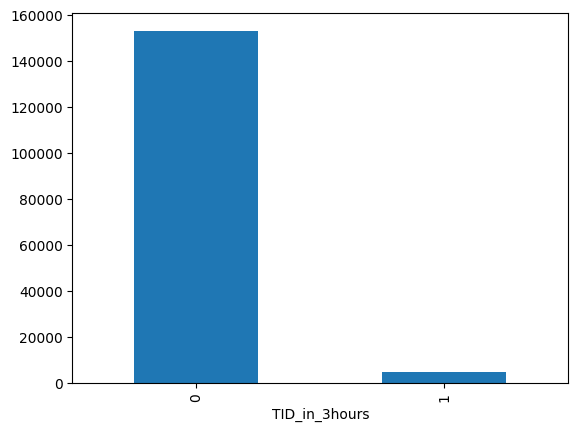

In [20]:
df_y['TID_in_3hours'].groupby(df_y["TID_in_3hours"]).count().plot(kind="bar")

FEATURES

In [28]:
df_x = pd.DataFrame()
back_steps = 12
limit = 1500

df_electrojet_res['IE'][df_electrojet_res['IE']>limit] = limit
for i in range(back_steps):
  df_x['F(t-' + str(back_steps- i)+')'] = df_electrojet_res['IE'].shift(periods= back_steps- i-1)


df_x['labels'] = 0
df_x['labels'].iloc[2:] = df_y['TID_in_3hours'].iloc[:-2]

df_x.index = df_x.index + pd.DateOffset(hours=1)

df_ML = df_x.iloc[back_steps -1 :]


from pathlib import Path  
filepath = Path('/content/gdrive/Shareddrives/T-FORSE/ML_Dataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_ML.to_csv(filepath) 
df_ML = df_ML.round(2)
df_ML.head(15)

<ipython-input-28-a1724378b058>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electrojet_res['IE'][df_electrojet_res['IE']>limit] = limit
<ipython-input-28-a1724378b058>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['labels'].iloc[2:] = df_y['TID_in_3hours'].iloc[:-2]


,F(t-12),F(t-11),F(t-10),F(t-9),F(t-8),F(t-7),F(t-6),F(t-5),F(t-4),F(t-3),F(t-2),F(t-1),labels
dt,,,,,,,,,,,,,
2014-01-01 06:30:00,43.90,80.30,105.85,114.70,109.92,98.08,92.24,93.29,125.80,143.82,140.16,174.43,0
2014-01-01 07:00:00,80.30,105.85,114.70,109.92,98.08,92.24,93.29,125.80,143.82,140.16,174.43,106.92,0
2014-01-01 07:30:00,105.85,114.70,109.92,98.08,92.24,93.29,125.80,143.82,140.16,174.43,106.92,85.96,0
2014-01-01 08:00:00,114.70,109.92,98.08,92.24,93.29,125.80,143.82,140.16,174.43,106.92,85.96,113.49,0
2014-01-01 08:30:00,109.92,98.08,92.24,93.29,125.80,143.82,140.16,174.43,106.92,85.96,113.49,75.04,0
2014-01-01 09:00:00,98.08,92.24,93.29,125.80,143.82,140.16,174.43,106.92,85.96,113.49,75.04,44.49,0
2014-01-01 09:30:00,92.24,93.29,125.80,143.82,140.16,174.43,106.92,85.96,113.49,75.04,44.49,50.81,0
2014-01-01 10:00:00,93.29,125.80,143.82,140.16,174.43,106.92,85.96,113.49,75.04,44.49,50.81,33.46,0
2014-01-01 10:30:00,125.80,143.82,140.16,174.43,106.92,85.96,113.49,75.04,44.49,50.81,33.46,74.33,0


<Axes: xlabel='labels'>

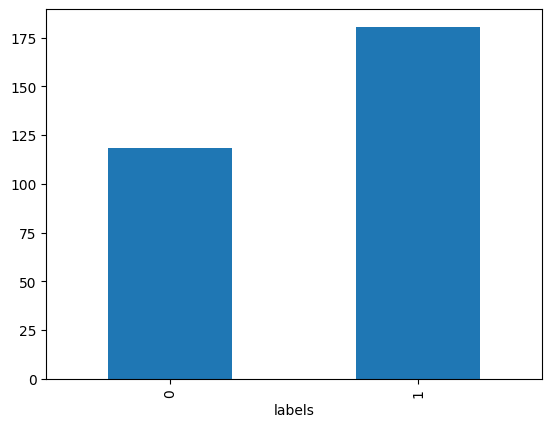

In [29]:
df_ML['F(t-1)'].groupby(df_ML["labels"]).mean().plot(kind="bar")

<Axes: ylabel='Frequency'>

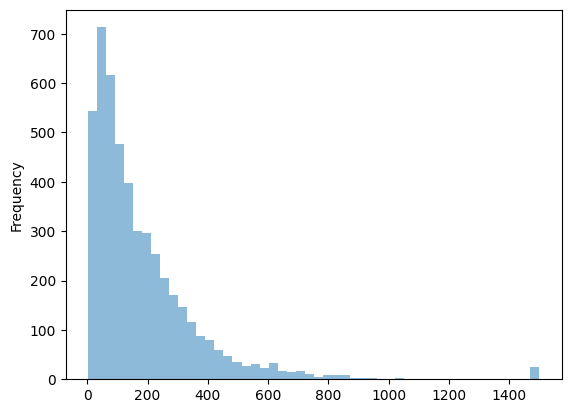

In [30]:
df_ML['F(t-1)'].round(0)[df_ML['labels'] == 1].plot.hist(bins=50, alpha=0.5)

<Axes: ylabel='Frequency'>

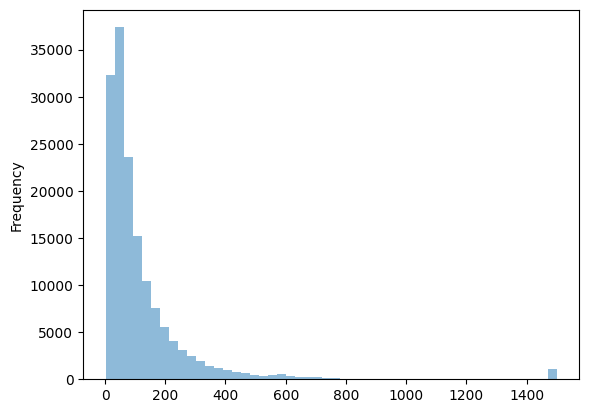

In [31]:
df_ML['F(t-1)'].round(0)[df_ML['labels'] == 0].plot.hist(bins=50, alpha=0.5)

(array([3.2372e+04, 3.7335e+04, 2.3537e+04, 1.5202e+04, 1.0484e+04,
        7.5750e+03, 5.5770e+03, 4.0780e+03, 3.0760e+03, 2.4340e+03,
        1.9100e+03, 1.4230e+03, 1.2100e+03, 9.2200e+02, 7.6300e+02,
        6.2500e+02, 4.9500e+02, 4.0000e+02, 4.2400e+02, 6.0600e+02,
        3.1000e+02, 2.1400e+02, 1.9600e+02, 1.9100e+02, 1.2400e+02,
        1.0000e+02, 6.6000e+01, 6.2000e+01, 4.2000e+01, 3.3000e+01,
        3.2000e+01, 2.5000e+01, 1.8000e+01, 1.0000e+01, 1.6000e+01,
        1.4000e+01, 7.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 5.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0400e+03]),
 array([   1.58  ,   31.5484,   61.5168,   91.4852,  121.4536,  151.422 ,
         181.3904,  211.3588,  241.3272,  271.2956,  301.264 ,  331.2324,
         361.2008,  391.1692,  421.1376,  451.106 ,  481.0744,  511.0428,
         541.0112,  570.9796,  600.948 ,  630.9164,  660.8848,  690.8532,
         720.8216,  75

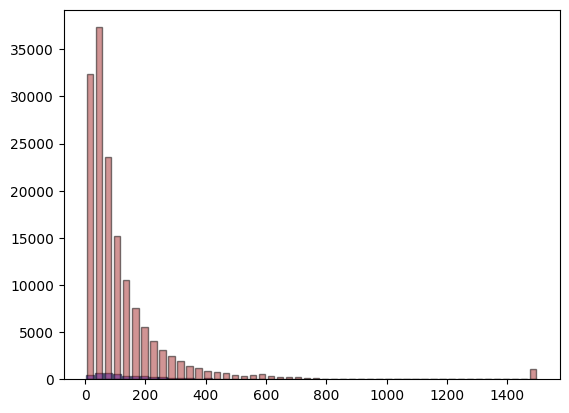

In [27]:
import matplotlib.pyplot as plt
plt.hist(df_ML['F(t-2)'][df_ML['labels'] == 1], edgecolor='black',color='blue',rwidth=0.9,alpha=0.5,label='Y', bins = 50)
plt.hist(df_ML['F(t-2)'][df_ML['labels'] == 0], edgecolor='black',color='brown',rwidth=0.7,alpha=0.5,label='N', bins = 50)

F(t-2)
F(t-3)
F(t-4)
F(t-6)
F(t-7)
F(t-8)
F(t-2)
F(t-3)
F(t-4)
F(t-6)
F(t-7)
F(t-8)


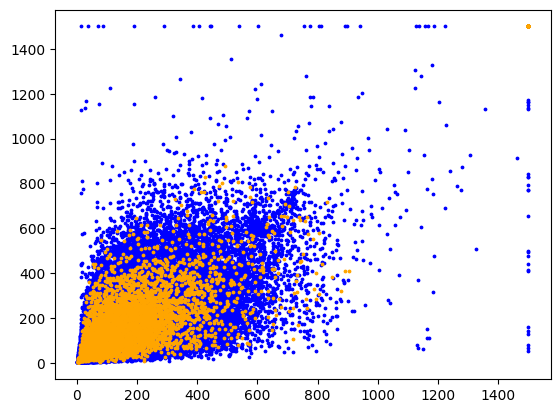

In [48]:
'''
x1_0 = df_ML['F(t-1)'][df_ML['labels'] == 0].to_numpy()
x1_1 = df_ML['F(t-1)'][df_ML['labels'] == 1].to_numpy()

x2_0 = df_ML['F(t-2)'][df_ML['labels'] == 0].to_numpy()
x2_1 = df_ML['F(t-2)'][df_ML['labels'] == 1].to_numpy()

x2_0 = df_ML['F(t-2)'][df_ML['labels'] == 0].to_numpy()
x2_1 = df_ML['F(t-2)'][df_ML['labels'] == 1].to_numpy()
'''


x1_0 = df_ML['F(t-1)'][df_ML['labels'] == 0].to_numpy()
for i in range(3):
  print('F(t-'+str(i+2)+')')
  x1_0 = x1_0 + df_ML['F(t-'+str(i+2)+')'][df_ML['labels'] == 0].to_numpy()

x2_0 = df_ML['F(t-5)'][df_ML['labels'] == 0].to_numpy()
for i in range(3):
  print('F(t-'+str(i+6)+')')
  x2_0 = x2_0 + df_ML['F(t-'+str(i+6)+')'][df_ML['labels'] == 0].to_numpy()

x1_1 = df_ML['F(t-1)'][df_ML['labels'] == 1].to_numpy()
for i in range(3):
  print('F(t-'+str(i+2)+')')
  x1_1 = x1_1 + df_ML['F(t-'+str(i+2)+')'][df_ML['labels'] == 1].to_numpy()

x2_1 = df_ML['F(t-5)'][df_ML['labels'] == 1].to_numpy()
for i in range(3):
  print('F(t-'+str(i+6)+')')
  x2_1 = x2_1 + df_ML['F(t-'+str(i+6)+')'][df_ML['labels'] == 1].to_numpy()


plt.scatter(x1_0/4, x2_0/4, s= 3, color = 'blue')
plt.scatter(x1_1/4, x2_1/4, s=3, color = 'orange')
plt.show()

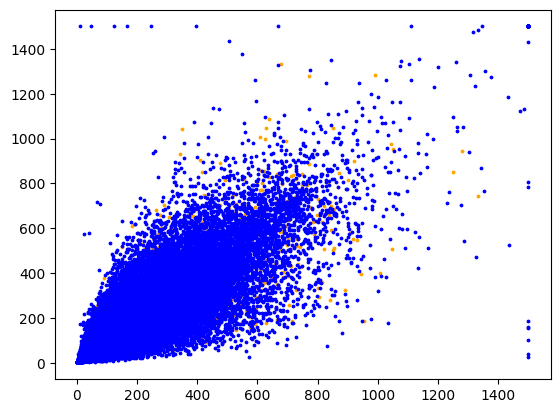

In [40]:
plt.scatter(x1_1, x2_1, s=3, color = 'orange')
plt.scatter(x1_0, x2_0, s= 3, color = 'blue')
plt.show()